#Music Genre Classification 2023

**Summary of each column in the dataset:**

1. artist: Name of the Artist.

2. song: Name of the Track.

3. popularity: The higher the value the more popular the song is.

4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

6. key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

11. instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

12. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

15. duration in milliseconds :Time of the song

16. time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

17. Class: Genre of the track.

###Exploratory Data Analysis

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project 2/train (1).csv")
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 2/test (2).csv')

In [ ]:
print("The Train Shap",train.shape)
print("___________________________")
print("The Test Shap",test.shape)

The Train Shap (14396, 18)
___________________________
The Test Shap (3600, 17)


In [ ]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
#a statistical summary of the data contained within the DataFrame or Series.
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
#it provides a summary of the descriptive statistics for columns containing object or string data types in a DataFrame.
train.describe(include='O')

,Artist Name,Track Name
count,14396,14396
unique,7913,12455
top,Backstreet Boys,Fire
freq,58,8


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
# Sum of null values , Sum of duplicated & calculate the number of unique values in a column.
#It returns the count of distinct or unique elements present in the column.
print("Number of null value in train set:")
print(train.isna().sum())
print("__________________________________________________________")
print("Duplicated :",train.duplicated().sum())
print("__________________________________________________________")
print(train.nunique())
print("__________________________________________________________")
print("")
print("")
print("Number of null value in test set:")
print(train.isna().sum())
print("__________________________________________________________")
print("Duplicated :",train.duplicated().sum())
print("__________________________________________________________")
print(train.nunique())

Number of null value in train set:
Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64
__________________________________________________________
Duplicated : 0
__________________________________________________________
Id                    14396
Artist Name            7913
Track Name            12455
Popularity              100
danceability            887
energy                 1156
key                      11
loudness               8051
mode                      2
speechiness            1177
acousticness           3725
instrumentalness       39

##Data Visualization

In [ ]:
# splitting our data into categorical and numerical
categorical_col = train[["Artist Name", "Track Name"]]
numerical_col = train.drop(["Artist Name", "Track Name"],axis=1)

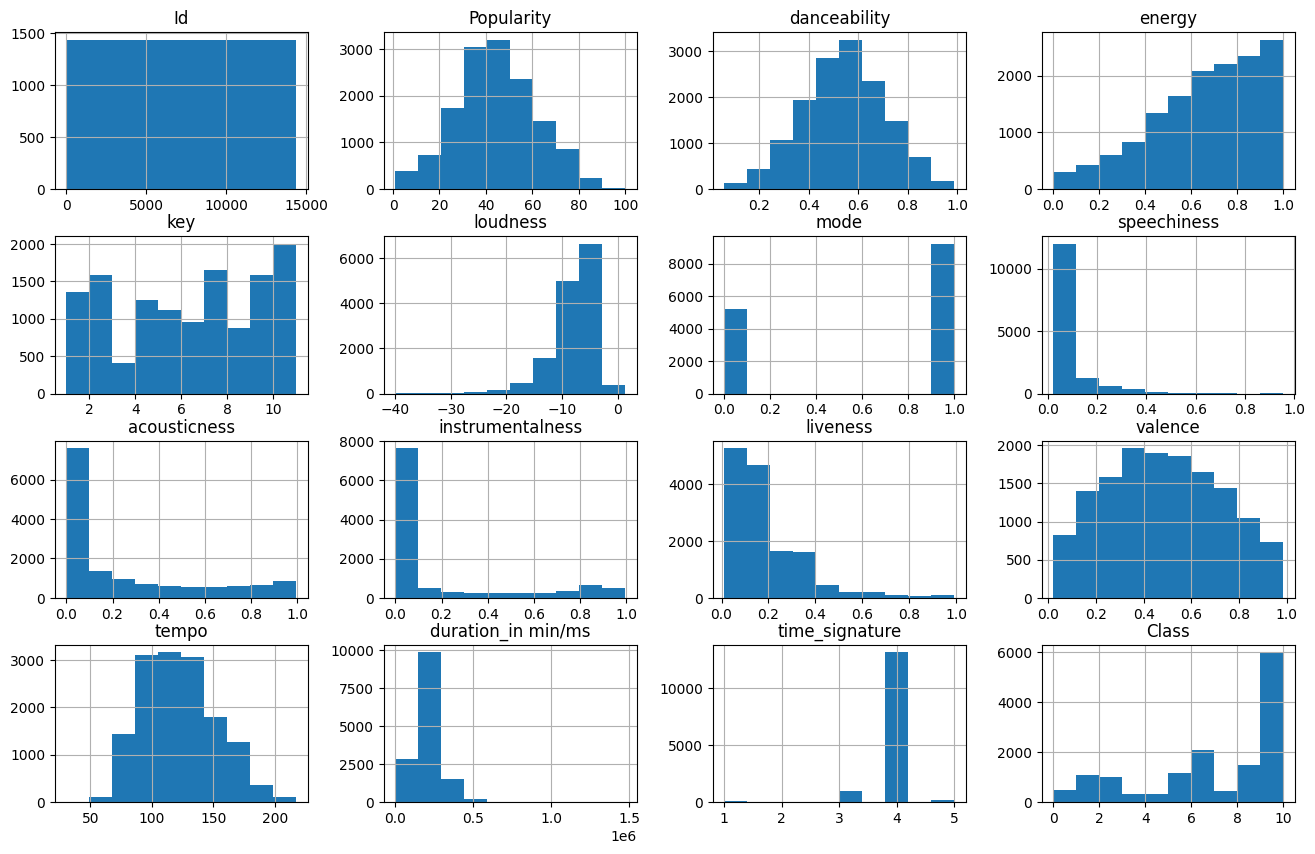

In [ ]:
numerical_col.hist(figsize=(16, 10));

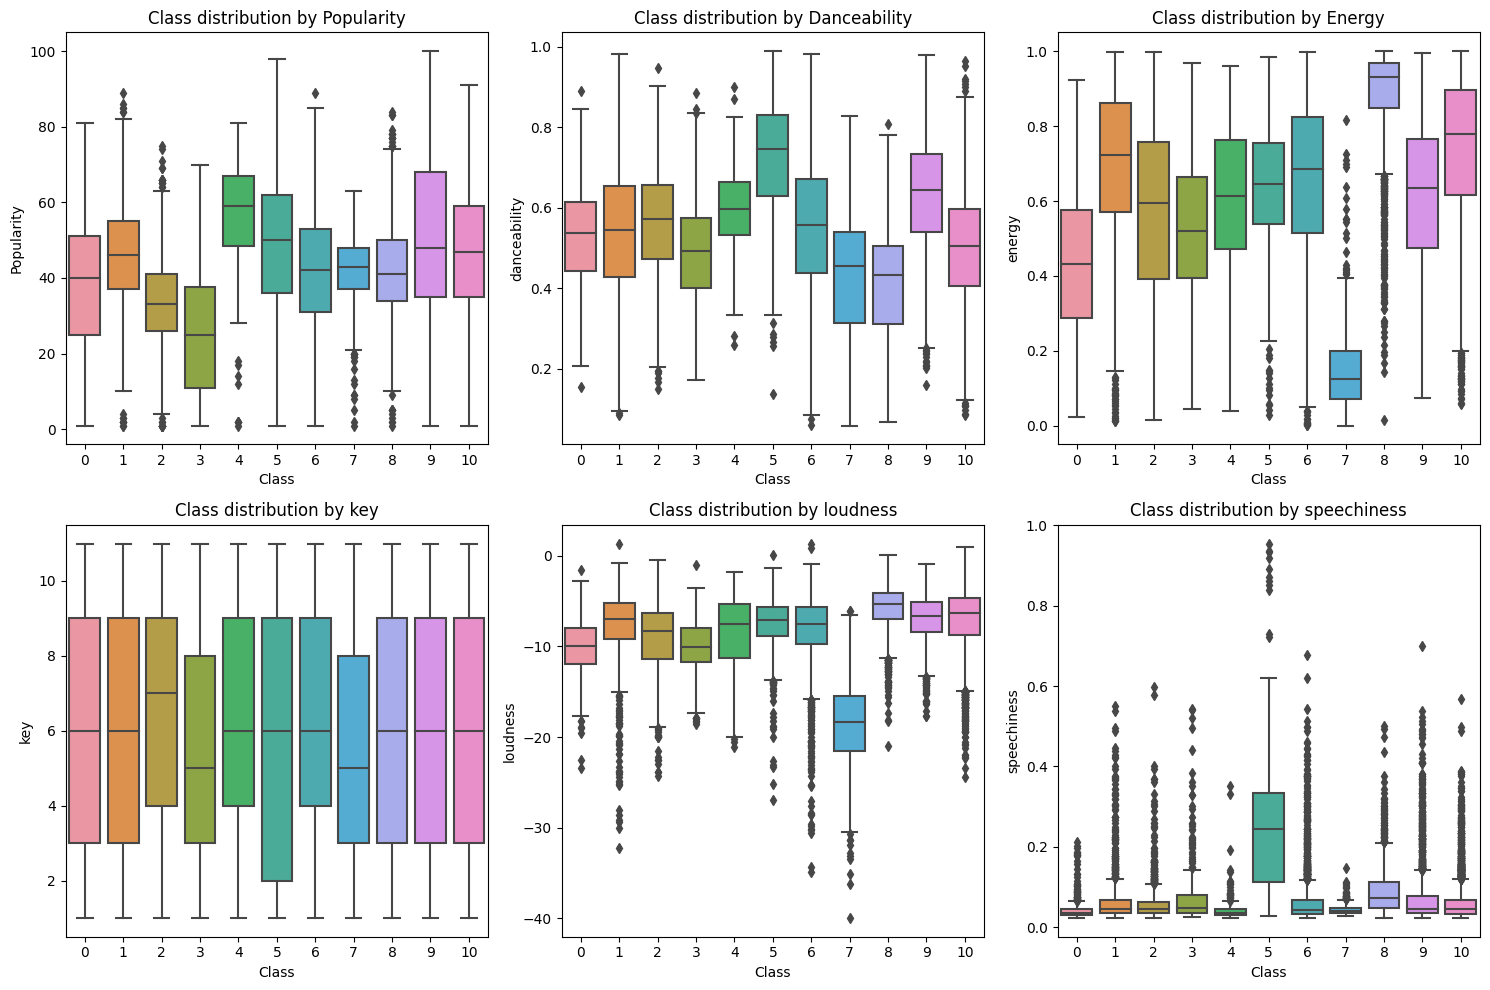

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

# Create the boxplots for color and cut
sns.boxplot(x="Class", y="Popularity", ax=axes[0][0], data=train)
sns.boxplot(x="Class", y="danceability", ax=axes[0][1], data=train)
sns.boxplot(x="Class", y="energy", ax=axes[0][2], data=train)
sns.boxplot(x="Class", y="key", ax=axes[1][0], data=train)
sns.boxplot(x="Class", y="loudness", ax=axes[1][1], data=train)
sns.boxplot(x="Class", y="speechiness", ax=axes[1][2], data=train)

# Set the titles for the subplots
axes[0][0].set_title("Class distribution by Popularity")
axes[0][1].set_title("Class distribution by Danceability")
axes[0][2].set_title("Class distribution by Energy")
axes[1][0].set_title("Class distribution by key")
axes[1][1].set_title("Class distribution by loudness")
axes[1][2].set_title("Class distribution by speechiness")
# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

<Axes: >

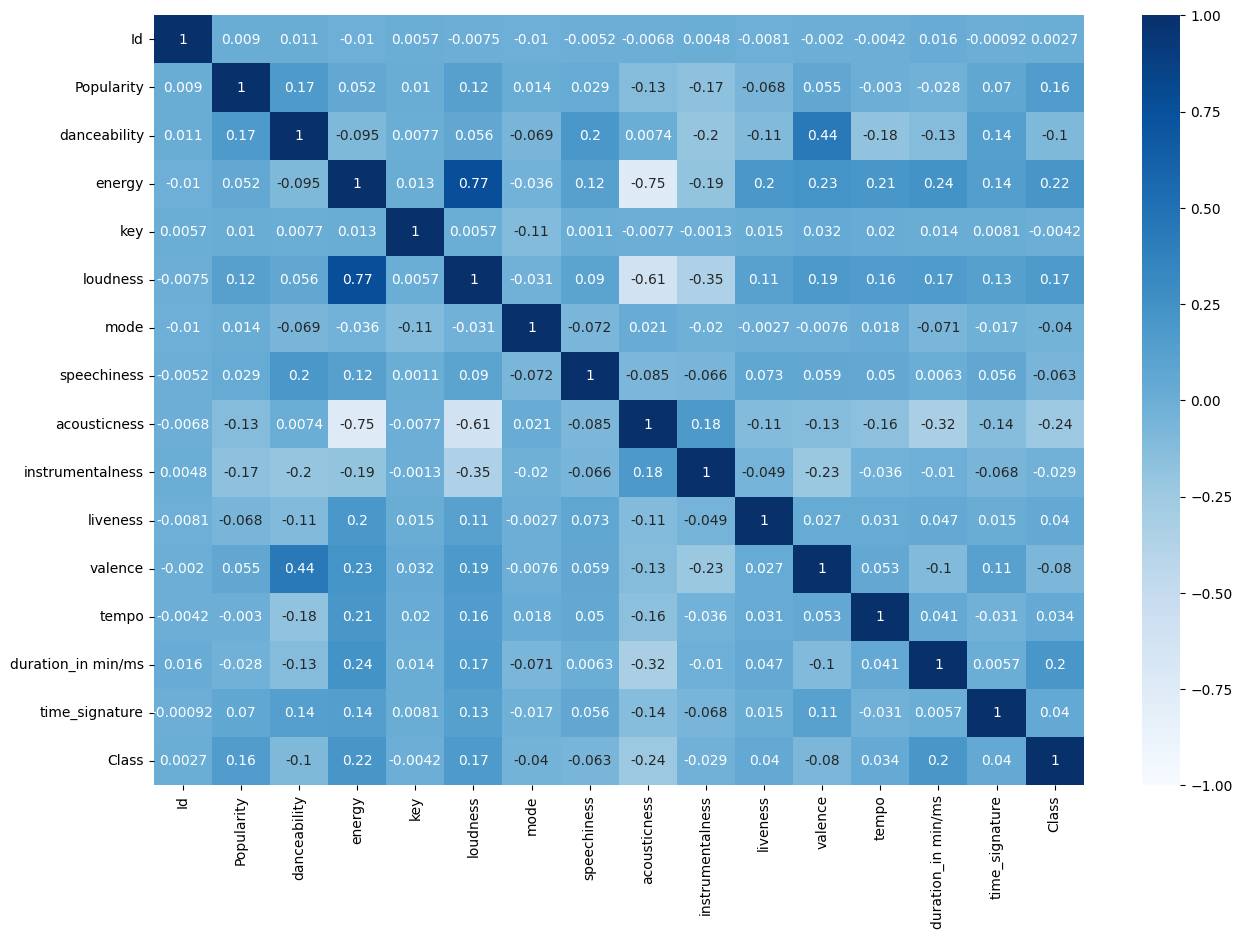

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(numerical_col.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True,ax=ax)

In [ ]:
# Removing highly correlated columns
#train.drop(["acousticness", "loudness"],inplace=True,axis=1)
#test.drop(["acousticness", "loudness"],inplace=True,axis=1)

In [ ]:
# Remove columns that contains missing values
train.drop(["mode"],inplace=True,axis=1)
test.drop(["mode"],inplace=True,axis=1)

In [ ]:
# Remove id column
ids=test['Id']
train.drop(["Id"],inplace=True,axis=1)
test.drop(["Id"],inplace=True,axis=1)
# Removing columns with high cadinality
train.drop(["Artist Name","Track Name"],inplace=True,axis=1)
test.drop(["Artist Name","Track Name"],inplace=True,axis=1)

In [ ]:
# Converting 'duration_in min/ms' from millisecond to minute
train["duration_in min/ms"] = train["duration_in min/ms"]/ 60000
train.rename(columns = {"duration_in min/ms":"duration_in_min"}, inplace = True)
test["duration_in min/ms"] = test["duration_in min/ms"]/ 60000
test.rename(columns = {"duration_in min/ms":"duration_in_min"}, inplace = True)

## Imputing Columns with Missing Data

In [ ]:
# Impute missing data for train set
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer.fit(train.drop(["Artist Name", "Track Name"],axis=1))
train_set = imputer.transform(train.drop(["Artist Name", "Track Name"],axis=1))
col_order = train.columns
train = pd.DataFrame(train_set, columns=train.drop(["Artist Name", "Track Name"],axis=1).columns)
train[["Artist Name", "Track Name"]] = categorical_col
train = train.reindex(columns=col_order)

In [ ]:
# Impute missing data for test set
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer.fit(test.drop(["Artist Name", "Track Name"],axis=1))
test_set = imputer.transform(test.drop(["Artist Name", "Track Name"],axis=1))
col_order = test.columns
test = pd.DataFrame(test_set, columns=test.drop(["Artist Name", "Track Name"],axis=1).columns)
test[["Artist Name", "Track Name"]] = categorical_col
test = test.reindex(columns=col_order)

In [ ]:
print("Number of null value in train set:")
print(train.isna().sum())
print("Number of null value in test set:")
print(test.isna().sum())

Number of null value in train set:
Id                  0
Artist Name         0
Track Name          0
Popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_in_min     0
time_signature      0
Class               0
dtype: int64
Number of null value in test set:
Id                  0
Artist Name         0
Track Name          0
Popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_in_min     0
time_signature      0
dtype: int64


## Checking for Outliers

In [ ]:
train.describe(percentiles=[.1,.25, .5, .75, .9])

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000
mean,44.525208,0.543105,0.662422,5.953781,-7.900852,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,3.334904,3.924354,6.695679
std,17.216285,0.165517,0.235967,3.015874,4.057362,0.085157,0.310922,0.264206,0.159258,0.239476,29.538490,1.861485,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,0.000008,1.000000,0.000000
10%,23.000000,0.326000,0.319000,2.000000,-12.928000,0.029800,0.000204,0.000011,0.073900,0.165000,85.513000,0.000073,4.000000,1.000000
25%,33.000000,0.432000,0.508000,4.000000,-9.538000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,2.757429,4.000000,5.000000
50%,44.000000,0.545000,0.699000,5.953781,-7.013500,0.047100,0.081450,0.053400,0.129000,0.480500,120.060000,3.482350,4.000000,8.000000
75%,56.000000,0.658000,0.861000,8.000000,-5.162000,0.083100,0.432250,0.178129,0.256000,0.672000,141.988250,4.204117,4.000000,10.000000
90%,68.000000,0.761000,0.943000,10.000000,-3.920000,0.173000,0.806000,0.700000,0.378000,0.820000,166.195500,5.100808,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,24.619783,5.000000,10.000000


In [ ]:
#low, high = train["Popularity"].quantile([0.05, 0.9])
#mask_popularity = train["Popularity"].between(low, high)

#low, high = train["speechiness"].quantile([0, 0.9])
#mask_speechiness = train["speechiness"].between(low, high)

#low, high = train["liveness"].quantile([0, 0.9])
#mask_liveness = train["liveness"].between(low, high)

#low, high = train["tempo"].quantile([0.1, 1])
#mask_tempo = train["tempo"].between(low, high)

#low, high = train["tempo"].quantile([0.1, 1])
#mask_tempo = train["tempo"].between(low, high)

#low, high = train["duration_in_min"].quantile([0, 0.9])
#mask_duration = train["duration_in_min"].between(low, high)


#train = train[mask_popularity & mask_speechiness & mask_liveness & mask_tempo & mask_duration]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        14396 non-null  float64
 1   danceability      14396 non-null  float64
 2   energy            14396 non-null  float64
 3   key               14396 non-null  float64
 4   loudness          14396 non-null  float64
 5   speechiness       14396 non-null  float64
 6   acousticness      14396 non-null  float64
 7   instrumentalness  14396 non-null  float64
 8   liveness          14396 non-null  float64
 9   valence           14396 non-null  float64
 10  tempo             14396 non-null  float64
 11  duration_in_min   14396 non-null  float64
 12  time_signature    14396 non-null  float64
 13  Class             14396 non-null  float64
dtypes: float64(14)
memory usage: 1.5 MB


In [ ]:
train.describe()

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000
mean,44.525208,0.543105,0.662422,5.953781,-7.900852,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,3.334904,3.924354,6.695679
std,17.216285,0.165517,0.235967,3.015874,4.057362,0.085157,0.310922,0.264206,0.159258,0.239476,29.538490,1.861485,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,0.000008,1.000000,0.000000
25%,33.000000,0.432000,0.508000,4.000000,-9.538000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,2.757429,4.000000,5.000000
50%,44.000000,0.545000,0.699000,5.953781,-7.013500,0.047100,0.081450,0.053400,0.129000,0.480500,120.060000,3.482350,4.000000,8.000000
75%,56.000000,0.658000,0.861000,8.000000,-5.162000,0.083100,0.432250,0.178129,0.256000,0.672000,141.988250,4.204117,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,24.619783,5.000000,10.000000


###Applying ML Models on Data

In [ ]:
pip install category_encoders

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
target = "Class"
X_train = train.drop(columns=target)
y_train = train[target]
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train, y_train, test_size=0.2, random_state=42
#)

###Decision Tree Classifier with Over Sampling

In [ ]:
# over sampling the data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
model = make_pipeline(
    MinMaxScaler(),
    DecisionTreeClassifier(random_state=42)
)
cv_acc_scores = cross_val_score(model, X_train_over, y_train_over, cv=5, n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_acc_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_acc_scores.mean()
std_cv_score = cv_acc_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

params = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_depth': range(10 ,50, 2),
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
model_dt_over = GridSearchCV(
    model,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

Cross-Validation Scores: [0.84477612 0.84328358 0.87210103 0.910907   0.90848547]
Mean Cross-Validation Score: 0.875910642605621
Standard Deviation of Cross-Validation Scores: 0.029442356224560467


In [ ]:
model_dt_over.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(10, 50, 2),
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=1)

In [ ]:
test_acc = model_dt_over.score(X_train_over,y_train_over)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.97


###Decision Tree Classifier with Under Sampling

In [ ]:
# over sampling the data
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)

model = make_pipeline(
    MinMaxScaler(),
    DecisionTreeClassifier(random_state=42)
)
cv_acc_scores = cross_val_score(model, X_train_under, y_train_under, cv=5, n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_acc_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_acc_scores.mean()
std_cv_score = cv_acc_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

params = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_depth': range(10 ,50, 2),
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
model_dt_under = GridSearchCV(
    model,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
model_dt_under.fit(X_train_under,y_train_under)

In [ ]:
test_acc = model_dt_under.score(X_train_under,y_train_under)
print("Test Accuracy:", round(test_acc, 2))

###Random Forest Classifier with Under Sampling

In [ ]:
# over sampling the data
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)

model = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state=42)
)
cv_acc_scores = cross_val_score(model, X_train_under, y_train_under, cv=5, n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_acc_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_acc_scores.mean()
std_cv_score = cv_acc_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

params = {
    "randomforestclassifier__n_estimators": range(25,400,25),
    "randomforestclassifier__max_depth": range(10 ,50, 2)
}
model_rf_under = GridSearchCV(
    model,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
model_rf_under.fit(X_train_under,y_train_under)

In [ ]:
test_acc = model_rf_under.score(X_train_under,y_train_under)
print("Test Accuracy:", round(test_acc, 2))

###Random Forest Classifier with Over Sampling

In [ ]:
# over sampling the data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
model = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state=42)
)
cv_acc_scores = cross_val_score(model, X_train_over, y_train_over, cv=5, n_jobs=-1)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_acc_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_acc_scores.mean()
std_cv_score = cv_acc_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

params = {
    "randomforestclassifier__n_estimators": range(25,200,25),
    "randomforestclassifier__max_depth": range(24 ,50, 2)
}
model_rf_over = GridSearchCV(
    model,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

Cross-Validation Scores: [0.86923077 0.87072331 0.89219288 0.9152698  0.91617867]
Mean Cross-Validation Score: 0.8927190856180424
Standard Deviation of Cross-Validation Scores: 0.020467921393169986


In [ ]:
model_rf_over.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(24, 50, 2),
                         'randomforestclassifier__n_estimators': range(25, 200, 25)},
             verbose=1)

In [ ]:
model_rf_over.best_params_

{'randomforestclassifier__max_depth': 34,
 'randomforestclassifier__n_estimators': 150}

In [ ]:
test_acc = model_rf_over.score(X_train_over,y_train_over)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.97


### Project Submission

In [ ]:
#Predict the response for test dataset
predict= model_rf_over.predict(test)

In [ ]:
# Creates a submission file in CSV format containing the predicted prices along with their corresponding IDs. The file can be used for submitting predictions.
submission = pd.DataFrame({"Id":ids , "Class": predict})
submission.to_csv("submissions.csv", index=False)
submission

,Id,Class
0,14397.0,9.0
1,14398.0,6.0
2,14399.0,9.0
3,14400.0,10.0
4,14401.0,5.0
...,...,...
3595,17992.0,10.0
3596,17993.0,5.0
3597,17994.0,1.0
3598,17995.0,2.0


In [ ]:
submission.describe()

,Id,Class
count,3600.000000,3600.000000
mean,16196.500000,6.742500
std,1039.374812,3.221312
min,14397.000000,0.000000
25%,15296.750000,5.000000
50%,16196.500000,8.000000
75%,17096.250000,10.000000
max,17996.000000,10.000000
